##Time Series Forecasting Of Shampoo Sales Using Mchine Learning Library Called ARIMA



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

In [ ]:
df.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(36, 1)

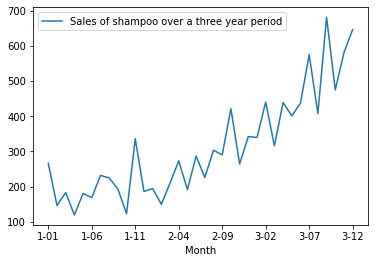

In [ ]:

df.plot()
plt.show()

In [ ]:
X=df.values


In [ ]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [ ]:
size = int(len(X) * 0.70)
print(len(X))
print(size)

36
25


In [ ]:
train, test = X[0:size], X[size:len(X)]

In [ ]:
train

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7]])

In [ ]:
test

array([[440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [ ]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=[387.37638769],Expected =[440.4]
Predicted=[348.15419409],Expected =[315.9]
Predicted=[386.30876953],Expected =[439.3]
Predicted=[356.08196012],Expected =[401.3]
Predicted=[446.37950078],Expected =[437.4]
Predicted=[394.73727567],Expected =[575.5]
Predicted=[434.91550367],Expected =[407.6]
Predicted=[507.9233499],Expected =[682.]
Predicted=[435.48283227],Expected =[475.3]
Predicted=[652.7437651],Expected =[581.3]
Predicted=[546.34345239],Expected =[646.9]
TEST MSE :8119.129692047803


In [ ]:
history

[array([266.]),
 array([145.9]),
 array([183.1]),
 array([119.3]),
 array([180.3]),
 array([168.5]),
 array([231.8]),
 array([224.5]),
 array([192.8]),
 array([122.9]),
 array([336.5]),
 array([185.9]),
 array([194.3]),
 array([149.5]),
 array([210.1]),
 array([273.3]),
 array([191.4]),
 array([287.]),
 array([226.]),
 array([303.6]),
 array([289.9]),
 array([421.6]),
 array([264.5]),
 array([342.3]),
 array([339.7]),
 array([440.4]),
 array([315.9]),
 array([439.3]),
 array([401.3]),
 array([437.4]),
 array([575.5]),
 array([407.6]),
 array([682.]),
 array([475.3]),
 array([581.3]),
 array([646.9])]

In [ ]:
output

(array([546.34345239]),
 array([63.455984]),
 array([[421.97200915, 670.71489564]]))

In [ ]:
output[0]

array([546.34345239])

In [ ]:
obs

array([646.9])

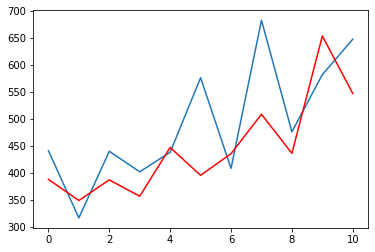

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()